In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 100em; }</style>"))
# ^This import is to have a larger display on the output, I'm not sure how to
# do that in Notebook

# find and open the Dark FITS files that were exposed for 30 secs and store them all in one list
file_prefix = "lab1_3_2_3.0000000"
file_end = ".DARK.FIT"
pixel_data = [None]*10

for i in range(0, 10, 1):
    filename = file_prefix + str(i) + file_end
    list = fits.open('../Lab_1/images/'+filename)
    image_data = list[0].data
    pixel_data[i] = image_data


/var/folders/74/9yc0dt9d53z15d2qpmgpxv4h0000gn/T/ipykernel_9631/4127876634.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
# open a 2d list to store median values
median_values = np.zeros((1024, 1024))

# run through and calculate the median value for each pixel
for i in range(0, 1024):
    for j in range(0, 1024):
        values = [pixel_data[x][i][j] for x in range(0,10)]
        median_values[i][j] = np.median(values)
        

In this box we're just running through all the pixels, indexed by i and j here, of all 10 images, and calculating the median values between them. We store these values in median_values so that we can plot the median combine image

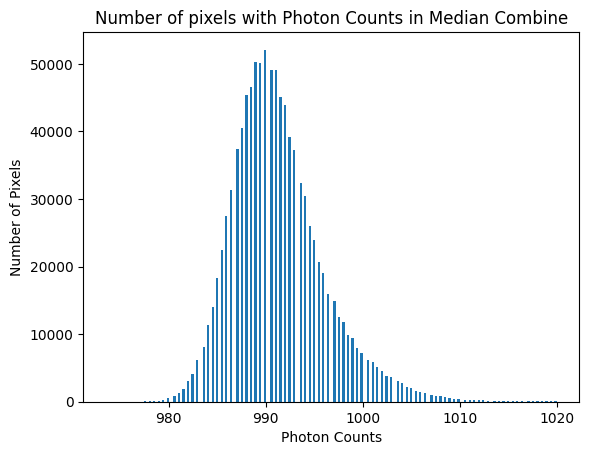

Text(0.5, 1.0, 'Number of Pixels with Photon Counts in Median Combine')

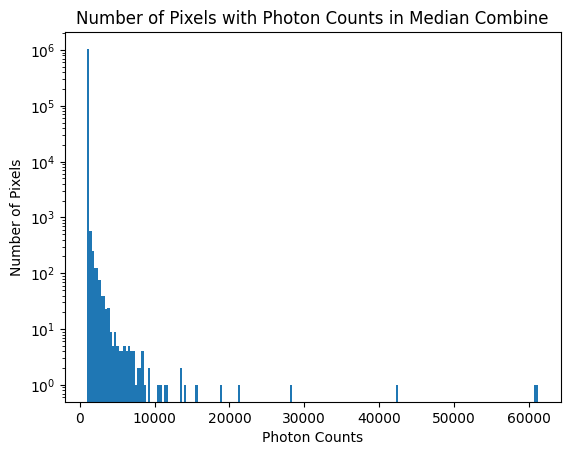

In [4]:
# flatten the data so we can calculate counts of certain values
flat_data = median_values.flatten()
med_min = np.min(flat_data)
# A lot of the data past this point is not a part of the normal distrubution
med_max = 1020
histogram = plt.hist(flat_data, range = (med_min, med_max), bins=200)
plt.xlabel('Photon Counts')
plt.ylabel('Number of Pixels')
plt.title("Number of pixels with Photon Counts in Median Combine")
plt.show()
#I am making a plot so we can see how high some of these pixels go with their counts
histogram2 = plt.hist(flat_data, range = (np.min(flat_data), np.max(flat_data)), bins = 200)
plt.xlabel('Photon Counts')
plt.ylabel('Number of Pixels')
plt.yscale("log")
plt.title("Number of Pixels with Photon Counts in Median Combine")

Here we are going to look at our data, and we see that even though the normal distribution appears to only b visible from a small range, by looking at the plot with a logscale we see that there is still a large amount of data that is a part of the distribution higher up. Where we see the decay in the log plot we can infer that their is still some relationship between the data, and then once there no longer looks to be a relationship we can say that those pixels are warm or hot. We see that around 10000 the data loses its relationship, and so those pixels beyond that are warm or hot. Taking the hot pixels to be really isolated, we take >20000 to be hot

In [5]:
# Creating a list to store the indices of the hot and warm pixels so we can see them on the median combine
# I set the threshold of hot pixels to be ones with >= 5000 counts, and warm pixels from 1300-5000 counts
# Everything below that just seemed like it wasn't that warm/hot

hot_pixels = []
warm_pixels = []
for i in range(0, 1024):
    for j in range(0, 1024):
        if median_values[i][j] >= 20000:
            hot_pixels.append([i, j])
        elif 10000 < median_values[i][j] < 20000:
            warm_pixels.append([i, j])

In this box we're just simply running through all of our median values and finding the indices of the pixels that are either warm (10000 < counts < 20000) or hot (20000<). We're taking these indices so that we can look at which individual images contain the hot/warm pixels that are also present in the median combine.

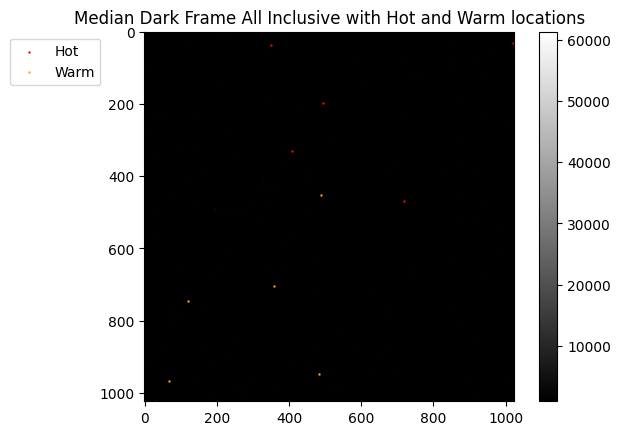

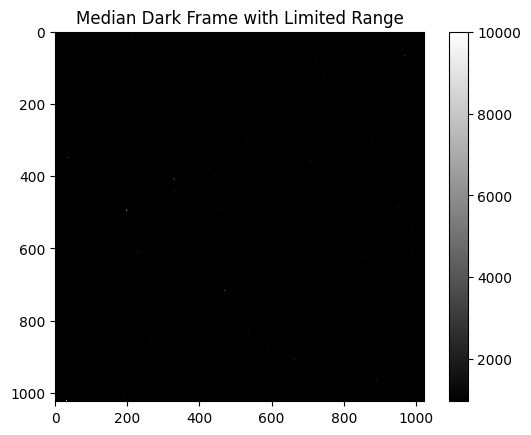

In [6]:
# I set the minimum rounded down to the tens place and set the maximum to the highest count to see how our
# hot and warm pixels appear

minimum = 970
maximum = np.max(flat_data)
plt.imshow(median_values, cmap='gray', vmin=minimum, vmax=maximum)
plt.title("Median Dark Frame All Inclusive with Hot and Warm locations")
plt.colorbar()

# Setting the indices in the lists to actual locations so that we can plot them as points on the image
x_indices = [hot_pixels[x][0] for x in range(0, len(hot_pixels))]
y_indices = [hot_pixels[x][1] for x in range(0, len(hot_pixels))]
xw = [warm_pixels[x][0] for x in range(0, len(hot_pixels))]
yw = [warm_pixels[x][1] for x in range(0, len(hot_pixels))]
plt.scatter(x_indices, y_indices, color='red', s=0.5, label = 'Hot')
plt.scatter(xw, yw, color='orange', s=0.5, label = 'Warm')
plt.legend(bbox_to_anchor=(-0.1, 1))
plt.show()

#Creating the image disregarding the warm and hot pixels
plt.imshow(median_values, cmap='gray', vmin=minimum, vmax=10000)
plt.title("Median Dark Frame with Limited Range")
plt.colorbar()

This step isn't really necessary or important, here we're just actually plotting the median dark frame to see how it looks. In the first image I plotted points that would point out the hot and warm pixel, with the hot pixels being colored in red and the warm pixels being colored in orange. The second image is just the median combine without the warm and hot pixels present. 

In [7]:
# Here we're running throught the pixels of each image to determine whether they are warm/hot in:
# 1. In the median combine and the image, 2. Just in the image 3. Just in the median combine

both_hot = [None] * 10
both_warm = [None] * 10
median_warm = [None]*10
median_hot = [None]*10
image_warm = [None]*10
image_hot = [None]*10
double_hot_indices = []
double_warm_indices = []

for i in range(0, 10):
    h = 0
    w=0
    mw = 0
    mh = 0
    iw = 0
    ih = 0
    print(f"\n We are now in Dark image # {i+1}")
    for j in range(0, 1024):
        for k in range(0, 1024):
            if pixel_data[i][j][k] >= 20000 and [j, k] in hot_pixels:
                h += 1
                both_hot[i] = h
                if [j, k] not in double_hot_indices:
                    double_hot_indices.append([j, k])
                else:
                    print(f"Another double hot for [{j}, {k}]")
            elif pixel_data[i][j][k] >= 20000 and [j, k] not in hot_pixels:
                ih += 1
                image_hot[i] = (ih)
            elif pixel_data[i][j][k] < 20000 and [j, k] in hot_pixels:
                mh += 1
                median_hot[i] = mh
            elif 10000 < pixel_data[i][j][k] < 20000 and [j, k] in warm_pixels:
                w += 1
                both_warm[i] = w
                if [j, k] not in double_warm_indices:
                    double_warm_indices.append([j, k])
                else:
                    print(f"Another double warm for [{j}, {k}]")
            elif 10000 < pixel_data[i][j][k] < 20000 and [j, k] not in warm_pixels:
                iw += 1
                image_warm[i] = iw
            elif 10000 < pixel_data[i][j][k] < 20000 and [j, k] in warm_pixels:
                mw += 1
                median_only_warm[i] = mw
    print(f"Number of pixels hot in both is {both_hot[i]}")
    print(f"Number of pixels warm in both is {both_warm[i]}")
    print(f"Number of pixels only warm in median and not this image is {median_warm[i]}")
    print(f"Number of pixels only hot in median and not this image is {median_hot[i]}")
    print(f"Number of pixels only hot in this image and not in median is {image_hot[i]}")
    print(f"Number of pixels only warm in this image and not in median is {image_warm[i]}")


 We are now in Dark image # 1
Number of pixels hot in both is 5
Number of pixels warm in both is 9
Number of pixels only warm in median and not this image is None
Number of pixels only hot in median and not this image is None
Number of pixels only hot in this image and not in median is None
Number of pixels only warm in this image and not in median is None

 We are now in Dark image # 2
Another double warm for [67, 968]
Another double warm for [119, 746]
Another double hot for [350, 36]
Another double warm for [359, 705]
Another double hot for [409, 329]
Another double warm for [484, 949]
Another double warm for [490, 453]
Another double hot for [495, 198]
Another double warm for [610, 230]
Another double hot for [718, 468]
Another double warm for [874, 589]
Another double warm for [909, 662]
Another double warm for [967, 889]
Another double hot for [1022, 31]
Number of pixels hot in both is 5
Number of pixels warm in both is 9
Number of pixels only warm in median and not this image i

In this box all we're doing is running through each of the pixels of each of the images and determining certain conditions. We want to know if:

1. The warm/hot pixel is present in both the median image and the single image
2. The warm/hot pixel is present in only the median image
3. The warm/hot pixel is present in only the single image

We then are also looking at and comparing the indices of the pixels that are hot/warm in both the median image and the single images. If the pixel is hot/warm in the median image and is also hot/warm in all of the single images, we can conclude that that pixels is hot/warm. We are calling these "double hot/warm" in the code If not then we can conclude that that pixel maybe was hit with a cosmic ray, since it did not appear in every image.

We see that for all of our individual images, there is never a case where the pixel is only hot/warm in the single image and not in the median image. That means that our image never gets hit by a cosmic ray or any other thing, but rather we have hot/warm pixels. These are:

1. Hot: [350, 36] , [409, 329] , [495, 198] , [718, 468] , [1022, 31]
2. Warm: [67, 968] , [119, 746] , [359, 705] , [484, 949] , [490, 453] , [610, 230] , [874, 589] , [909, 662] , [967, 889]

In [8]:
#-----------------------------------Section 4.2----------------------------------

In [11]:
# find and open the Dark FITS files that were exposed from 10s - 2min in intervals of 10 sec
# and storing them in one file
series_data = [None] * 13 

list = fits.open("../Lab_1/images/lab1_bias.00000001.BIAS.FIT")
series_data[0] = list[0].data

file_pre = "lab1_dark.000000"
file_suf = ".DARK.FIT"

for i in range(0, 12):
    if i < 8:
        file_pref = file_pre + '0'
        file_name = file_pref + str(i + 2) + file_suf
        list = fits.open("../Lab_1/images/" + file_name)
        image_data = list[0].data
        series_data[i+1] = image_data
    else:
        file_name = file_pre + str(i + 2) + file_suf
        list = fits.open("../Lab_1/images/" + file_name)
        image_data = list[0].data
        series_data[i+1] = image_data

Here we're just opening up our files again, we're also including our bias frame taken at 0C as well.

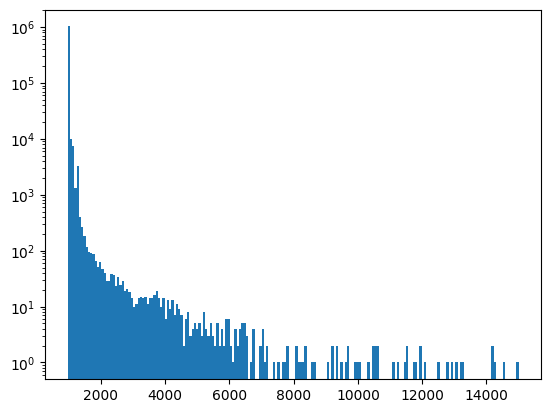

In [12]:

flat_data = series_data[6].flatten()
min = np.min(flat_data)
max = 15000
histogram = plt.hist(flat_data, range = (min, max), bins = 200)
plt.yscale("log")
plt.show()

This box above is to just do what we did in th first part, where we're looking at the plots of each image on a logscale, so that we can see where the data starts to lose its realtionship with the rest of the data. We can just change the index to get each separate image, and its sort of up in the air exactly where to cut off the data so we try our best.

In [13]:
# Creating a list of minimums and maximums that set the range to get a good representation of our normal
# distribution, essentially ignoring the outlying warm and hot pixels

from scipy import stats

maxs = [1250, 4000, 6500, 10000, 12000, 10000, 10000, 10000, 10000, 10000, 11000, 12200, 13000]
mean_counts = []
st_devs = []
stat_uncs = []

# Running through the images and flattening the data, sampling our data to including the counts within
# the range set to represent our data. We calculate the mean, standard deviation, and uncertainty of the mean
# of this sample, and store these values

for i in range(0,13):
    flat_data = series_data[i].flatten()

    series_min = np.min(flat_data)
    series_max = maxs[i]
    data_set = []
    for j in range(0, len(flat_data)):
        if series_min < flat_data[j] < series_max:
            data_set.append(flat_data[j])

    mean = np.mean(data_set)
    mean_counts.append(mean)
    st_dev = stats.tstd(data_set)
    st_devs.append(st_dev)
    stat_unc = mean / np.sqrt(len(data_set))
    stat_uncs.append(stat_unc)

In this box we're going through all of the images and within the specified range we've established, we're calculating the mean, standard deviation, and statistical uncertainty on the mean of each image. We store these values so we can use them later.

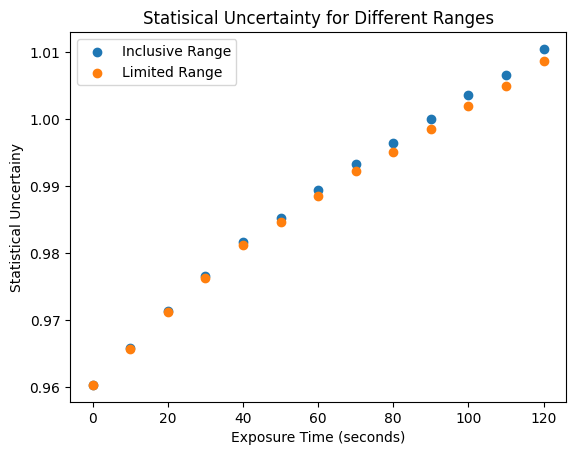

In [14]:
# Here we are calculating the uncertainty once again but this time including more and then all of
# the data points collected, so that we can see the systemic uncertainty
whole_st_devs = []
whole_stat_uncs = []

for i in range(0,13):
    flat_data = series_data[i].flatten()

    series_min = np.min(flat_data)
    series_max = np.max(flat_data)
    data_set = []
    mean = np.mean(flat_data)
    st_dev = stats.tstd(flat_data)
    whole_st_devs.append(st_dev)
    stat_unc = mean / np.sqrt(len(flat_data))
    whole_stat_uncs.append(stat_unc)

exposure_times = [10 * x for x in range(0, 13)]

plt.scatter(exposure_times, whole_stat_uncs, label="Inclusive Range")
plt.scatter(exposure_times, stat_uncs, label="Limited Range")
plt.title("Statisical Uncertainty for Different Ranges")
plt.xlabel("Exposure Time (seconds)")
plt.ylabel("Statistical Uncertainy")
plt.legend()

Here we are doing exactly what we did in the previous box, but now we are making sure to include all of the data rather than a specified range. Once we get the statiscal uncertainty for that data as well, we want to plot the statistical uncertainty for both the limited range and the range that is all inclusive. By comparing the statistical uncertainties on the means for both ranges and plotting them, we can see how much the uncertainty varies with how much our data range does, thus showing how influential the systematic uncertainty is. Since the uncertainties do not seem to change that much when we used our different range, we can infer that the statistical uncertainty is dominant in our data rather than systematic uncertainty. 

The dark current rate is 0.7996 +/- 0.0258 e/p/s
The offsest is 986.5088 +/- 0.9112


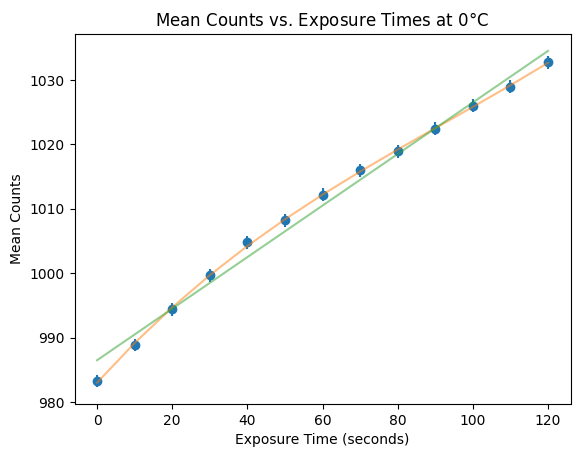

In [15]:
# importing curve_fit to fit a line to our data

from scipy.optimize import curve_fit

# creating a list of the exposure time values in seconds and plotting our mean counts to their
# corresponding exposure times


plt.scatter(exposure_times, mean_counts)
plt.errorbar(exposure_times, mean_counts, yerr=stat_uncs, linestyle='')
plt.xlabel("Exposure Time (seconds)")
plt.ylabel("Mean Counts")
plt.title("Mean Counts vs. Exposure Times at 0$\\degree$C")

# defining the function of a line so that we can model our data
def linear(exposure, dark_current_rate, offset):
    """
    fitting a line to our data of mean counts vs. exposure time
    
    param exposure: The amount of time the frame was exposed for
    param dark_current_rate: the dark current in electrons per pixel per second
    param offset: The number of electrons the measurements are offset by
    
    """
    return dark_current_rate * exposure + offset

def cubic(exposure, a, b, c, d):
    """ trying a cubic function just to see how well it fits our mean counts, possibly
    seeing that there's a different relationship between our values
    
    Not really sure what the parameters a, b, c, and d would represent
    
    param exposure: The amount of time the frame was exposed for
    
    """
    return a*(exposure ** 3) + b*(exposure ** 2) + c*exposure + d

# extracting our dark current rate and the offset from the fit, along with the covariance of thes vlaues
parameters, covariance = curve_fit(linear, exposure_times, mean_counts)
dark_current_rate, offset = parameters
uncertainty_in_dcr = np.sqrt(covariance[0][0])
uncertainty_in_offset = np.sqrt(covariance[1][1])

p, c = curve_fit(cubic, exposure_times, mean_counts)
a, b, c, d = p
cubics = [cubic(exposure, a, b, c, d) for exposure in exposure_times]
plt.plot(exposure_times, cubics, alpha = 0.5)

gain = 2.0

print(f"The dark current rate is {dark_current_rate * gain:.4f} +/- {uncertainty_in_dcr * gain:.4f} e/p/s")
print(f"The offsest is {offset:.4f} +/- {uncertainty_in_offset:.4f}")

model_mean_counts = [linear(exposure, dark_current_rate, offset) for exposure in exposure_times]
plt.plot(exposure_times, model_mean_counts, alpha = 0.5)

Here we are just simply plotting the mean counts for each image and performing a linear regression on it. The slope of this line gives us the dark current rate, which we have to multiply by the gain so we can determine what the actual dark current in units of  e/p/s. We can als determine what the bias of the camera is.

We can see that our line fits relatively well but is not ideal, but it appears the mean counts follow more or less a cubic pattern. Unnecessarily, we also fitted a cubic function to our data to see how well this represents the relationship between the mean counts and the exposure times. We see that this fits our data so much better, but the interpretation of the coeffecients in the cubic function is hard to determine.

Our farthest mean count is within 0.4005 sigmas


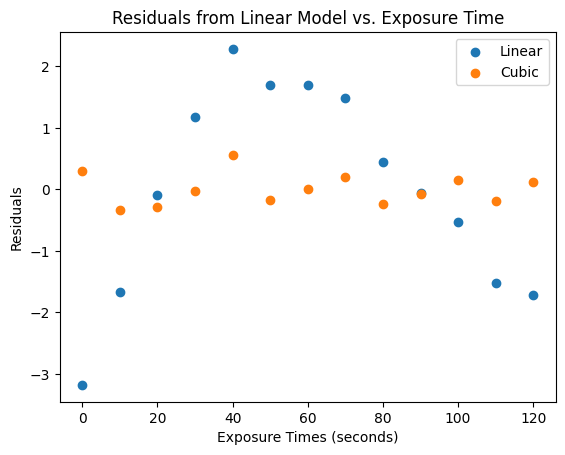

In [16]:
# Calculating the residuals by finding the difference between actual value and model value
residuals = []
residuals_cubic = []

for i in range(0, len(mean_counts)):
    distance = mean_counts[i] - linear(exposure_times[i], dark_current_rate, offset)
    distance_cubic = mean_counts[i] - cubic(exposure_times[i], a, b , c, d)
    residuals.append(distance)
    residuals_cubic.append(distance_cubic)

plt.scatter(exposure_times, residuals, label="Linear")
plt.scatter(exposure_times, residuals_cubic, label="Cubic")
print(f"Our farthest mean count is within {np.abs(residuals[0]) / st_devs[0]:.4f} sigmas")
plt.title("Residuals from Linear Model vs. Exposure Time")
plt.ylabel("Residuals")
plt.xlabel("Exposure Times (seconds)")
plt.legend()

Here we are plotting the residuals (The distance from our actual data points to our model lines), against the exposure time to see how well our line fits our data. For our linear fit, we notice that the data does not seem to be varying off the model in a way that represents random noise, but rather had a sort of parabolic shape. This infers that the linear model is not the best way to represent this. When we calculate the residuals when we fitted our cubic function , we see that the residuals due appear to be random and noiselike. This tells us that the cubic function is a much better fit for our data rather than the linear fit.

The dark current at -15 degrees C is 1.8304 +/- 0.7025 e/p/s


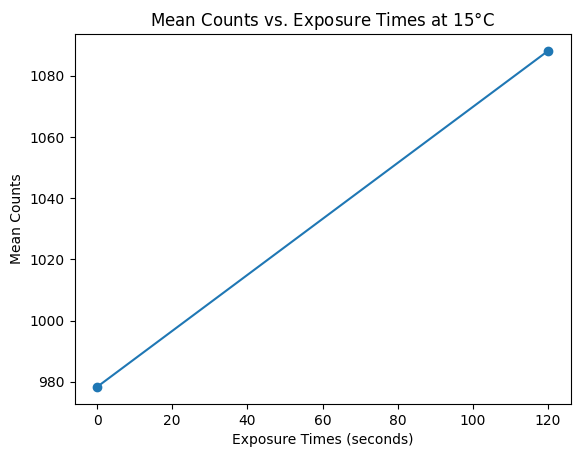

In [18]:
# Here we are estimating the dark current of our Bias Frame and our Dark frame at -15 degrees C

bias = fits.open("../Lab_1/images/lab1_3_2_4.00000010.BIAS.FIT")
dark = fits.open("../Lab_1/images/lab1_3_2_4.00000011.DARK.FIT")

bias_frame = bias[0].data
dark_frame = dark[0].data

flat_dark = dark_frame.flatten()
flat_bias = bias_frame.flatten()

dark_data=[]
bias_data=[]

for i in range(0, len(flat_dark)):
    if flat_dark[i] < 10000:
        dark_data.append(flat_dark[i])
    if flat_bias[i] < 10000:
        bias_data.append(flat_bias[i])
        

bias_mean = np.mean(bias_data)
dark_mean = np.mean(dark_data)
std_dev_15 = [stats.tstd(bias_data), stats.tstd(dark_data)]

means = [bias_mean, dark_mean]
times = [0, 120]
offset_15 = bias_mean
dark_current_rate_15 = (dark_mean - bias_mean) / (120. - 0)
uncertainty_dcr_15 = (np.sqrt(std_dev_15[1]**2 + std_dev_15[0]**2)) / 120.

plt.plot(times, [dark_current_rate_15 * x + offset_15 for x in times])
plt.title("Mean Counts vs. Exposure Times at 15$\\degree$C")
plt.xlabel("Exposure Times (seconds)")
plt.ylabel("Mean Counts")
plt.scatter(times, means)

print(f"The dark current at -15 degrees C is {dark_current_rate_15 * gain:.4f} +/- {uncertainty_dcr_15:.4f} e/p/s")

To calculate the dark current at -15C, in which we only use a bias frame and one dark frame, we do what we did before where we can set a line to our data and take the slope of this line to be our dark current rate at this temperature. We simply do rise/run to find the line slope, and I calculate the uncertainty doing the noraml error propagation stuff. The uncertainty seems a little large, but this would go down if we had more dark frames to work with.